# Отчет: задание 3

*Неверо Андрей, лабораторная работа 2, 2 курс, 4 группа*

В задании требовалось написать программу, реализующую QR-алгоритм нахождения всех собственных значений и собственных векторов матрицы.

Решением данной задачи можно считать реализацию методов *CountUpperHessenbergMatrix*, *RunQRAlgorithmIteration*, *RunQrAlgorithm*, *GetEigenvectorsFromHessenbergMatrix* класса Matrix (см. соответствующий заголовочный файл), а также реализацию еще нескольких небольших вспомогательных методов, связанных с QR-разложением матриц.

Обработка связанных с этим заданием входных данных вынесена в отдельный класс, определенный в заголовочном файле Task8.

## Описание алгоритма

Реализована стандартная версия QR-алгоритма с использованием верхней формы Хессенберга и метода вращений (Гивенса). Исходная матрица приводится к данной форме, после чего запускается цикл итераций. В каждой итерации эффективно вычисляется QR-разложение текущей матрицы (используется тот факт, что матрица является почти треугольной), после чего происходит перемножение матриц R и Q.

В качестве условия сходимости метода используется сравнение элементов на главной диагонали и на одной диагонали под ней с их значениями на предыдущей итерации.

Асимптотическая сложность приведения матрицы к форме Хессенберга (что происходит однократно) - $O(n^3)$. Асимптотическая сложность каждой итерации - O(n^2) (такой асимптотики можно добиться благодаря тому, что умножение на матрицу поворота реализуется за линейное время).

Как известно, если QR-алгоритм применим к матрице (то есть сходится), в результате мы получим почти треугольную матрицу с блоками на диагонали, причем по блокам можно будет восстановить все действительные и комплексные собственные значения матрицы. Данная возможность успешно реализована.

Для симметрических матриц, все собственные значения которых действительны, дополнительно можно извлечь из итоговой матрицы поворотов все собственные вектора, соответствующие найденным значениям. Данная возможность также успешно реализована.
Для несимметрических матриц возвращаемые вектора не будут собственными (они будут составлять ортогональный базис пространства). При необходимости в перспективе можно реализовать восстановление векторов для несимметрических матриц с помощью решения однородной системы линейных уравнений.

## Пункт 1

С помощью алгоритма удалось найти все собственные значения заданной матрицы.

$$ \lambda \in \{-0.916368 + 3.92541i, -0.916368 - 3.92541i, 1.36208 + 3.66686i, 1.36208 - 3.66686i, -3.41571, 3.11316, -0.754739 + 1.26076i, -0.754739 - 1.26076i, 0.997202, -0.0765952 \} $$

Так как матрица не является симметрической, найти ее собственные вектора без дополнительных методов не представляется возможным.

## Пункт 2

С помощью алгоритма удалось найти все собственные значения заданной матрицы.

$$ \lambda \in \{ 3.85232, -3.66921, -3.23279, 1.33293 + 2.80564i, 1.33293 - 2.80564i, -1.72285 + 2.52776i, -1.72285 - 2.52776i, 2.99193, -0.769187 + 2.73123i, -0.769187 - 2.73123i, 0.0924703 + 2.82532, 0.0924703 - 2.82532, 2.30574, -2.29641, 1.6423, 0.856813 + 1.06709, 0.856813 - 1.06709, -0.813381, -0.180424 + 0.311717, -0.180424 - 0.311717 \} $$

Так как матрица не является симметрической, найти ее собственные вектора без дополнительных методов не представляется возможным.

## Анализ времени работы алгоритма

Как показало тестирование на практике, попытки анализа времени работы данного алгоритма для случайных матриц изначально обречены на провал. Все объективные выводы, что можно сделать, состоят в том, что чем больше матрица, и чем больше требуемая точность, тем дольше будет сходиться алгоритм. Какие-либо более точные оценки скорости сходимости, различий между размерами матриц, невозможны, так как случайные матрицы сходятся совершенно по-разному (а могут и вовсе не сходиться).

Чтобы убедиться в этом, приведем график зависимости времени работы алгоритма от размера матрицы и требуемой точности. В качестве матриц использовались случайные матрицы с действительными собственными значениями (дабы вероятность получения корректного результата была выше). Они генерировались как $A = S^{-1} D S$, где $S$ - случайная матрица, $D$ - случайная диагональная матрица.

Вертикальная ось графика - микросекунды, горизонтальная - размер матрицы (до 70 включительно, $n = 5k$). Графики разных цветов соответствуют разной требуемой точности:
* Красный - точность до $0.0001$
* Синий - точность до $0.000001$
* Зеленый - точность до $0.00000001$

Для каждого значения $n$ проводилось три теста, в качестве результата было взято среднее значение затраченного времени. Работа алгоритма прерывалась после $100000$ итераций. Соответствующие матрицы для каждой из точностей были одинаковы.

In [1]:
from data import task8
import matplotlib
%matplotlib inline

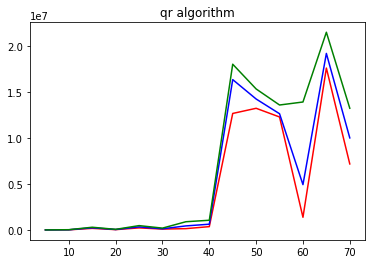

In [2]:
bins = [i for i in range(5, 71, 5)]
matplotlib.pyplot.title("qr algorithm")
matplotlib.pyplot.plot(bins, task8.four_numbers_time, 'r',
                       bins, task8.six_numbers_time, 'b',
                       bins, task8.eight_numbers_time, 'g')
matplotlib.pyplot.show()

Даже несмотря на то, что тестирование проводилось на диагонализируемых матрицах, бралось усредненное значение времени, и закцикливание алгоритма принудительно прерывалось, график имеет совершенно непонятный вид. Время работы скачет независимо от размеров матриц. Явно видно лишь то, что оно резко возрастает при $n > 40$ (возможно, это связано с кешированием). Кроме того, требуемая точность действительно может заметно повлиять на время работы алгоритма. 

## Размер матрицы, обрабатываемой за минуту

Корректный и объективный ответ на этот вопрос невозможен по причинам, описанным выше. Можно лишь привести некоторые примеры.

Диагонализируемую матрицу порядка $100$ с возмущенными элементами, равными по модулю от $1$ до $5000$, на моем компьютере алгоритм обрабатывает за 70 секунд с точностью до 14 знаков после точки. При уменьшении точности время работы алгоритма уменьшается.